# Regression

In [317]:
import pandas as pd
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')



In [318]:
dataset = pd.read_csv("/kaggle/input/fish-market/Fish.csv")
dataset.shape

(159, 7)

In [319]:
dataset.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [320]:
x = dataset[["Length1","Length2","Length3","Width"]]
y = dataset["Weight"]

In [321]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size =.2, random_state = 42)

# **Ridge**

In [322]:
degree_of_freedom = 2
ridge = make_pipeline(PolynomialFeatures(degree_of_freedom),Ridge(alpha =1.0))
ridge.fit(x_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge())])

In [323]:
prediction_result_ridge = ridge.predict(x_test)
print(prediction_result_ridge)

[  93.26467861   -3.44059182  211.51195758  245.67153112  144.04085414
  855.09200623    8.47528818  176.12234186  201.31876565 1419.67235845
  614.5734036   776.02758141  574.21095838  108.26094433  657.32205139
  850.35368979 1179.55742867  176.05123803  156.82600297  556.72766829
   -1.5972462   532.95323807  397.96093004  486.60001512  842.54187269
  990.05577945  154.64307642  252.68506313   17.23631406   -5.74344336
  463.41999994   73.82274763]


# Lasso

In [324]:
lasso = make_pipeline(PolynomialFeatures(degree_of_freedom),Lasso(alpha =1.0))
lasso.fit(x_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('lasso', Lasso())])

In [325]:

prediction_result_lasso = lasso.predict(x_test)
print(prediction_result_lasso)

[  77.12810673   -9.1068754   183.96079248  254.05824726  135.20211382
  856.07832261    4.60298322  190.25857936  195.49493999 1411.4590238
  612.55991318  807.67711303  570.05331765  119.46088     643.22278227
  839.68249358 1166.52407834  183.06570604  145.60496907  546.51391786
   -2.78814501  525.2393869   383.00020835  466.52356631  833.33368399
 1005.26511677  145.20619667  259.80696994   14.13255183   -8.031933
  494.37469077   73.53288896]


# ElasticNet

In [326]:
degree_of_freedom = 2
elasticNet = make_pipeline(PolynomialFeatures(degree_of_freedom),
                           ElasticNet(alpha =1.0, l1_ratio = 0.5,  max_iter=10000))
elasticNet.fit(x_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('elasticnet', ElasticNet(max_iter=10000))])

In [327]:
prediction_result_elasticNet = elasticNet.predict(x_test)
#np.set_printoptions(suppress = True)
print(prediction_result_elasticNet)

[  84.53208708  -10.15456992  199.28029868  258.30902825  142.93922291
  872.4147257     2.05587196  188.27612007  202.70033414 1410.41438123
  608.91884679  802.88055328  567.57434259  113.48336194  654.65732011
  860.27537553 1163.37402051  187.46865504  154.56595437  547.14881185
   -5.8354695   528.05395503  385.41845637  458.26005434  854.06749626
  993.57440299  153.39775409  264.39805159    9.08765728  -10.77035502
  492.63284444   74.43402819]


# **Regularization Impact Study: Ridge vs. Lasso vs. ElasticNet**

**Mean Squared Error (MSE), R Square Error**

In [328]:
ridge_mean_squared_error = mean_squared_error(y_test,prediction_result_ridge, squared = False)
ridge_r2 =r2_score(y_test,prediction_result_ridge)

lasso_mean_squared_error = mean_squared_error(y_test,prediction_result_lasso, squared = False)
lasso_r2 =r2_score(y_test,prediction_result_lasso)

elasticnNet_mean_squared_error = mean_squared_error(y_test,prediction_result_elasticNet, squared = False)
elasticnNet_r2 =r2_score(y_test,prediction_result_elasticNet)

In [329]:
print(ridge_mean_squared_error)
print(lasso_mean_squared_error)
print(elasticnNet_mean_squared_error)

82.04491763140285
79.87888452148083
77.4628434730077


In [330]:
print(ridge_r2)
print(lasso_r2)
print(elasticnNet_r2)

0.952675743397759
0.9551415341405947
0.9578141014876936


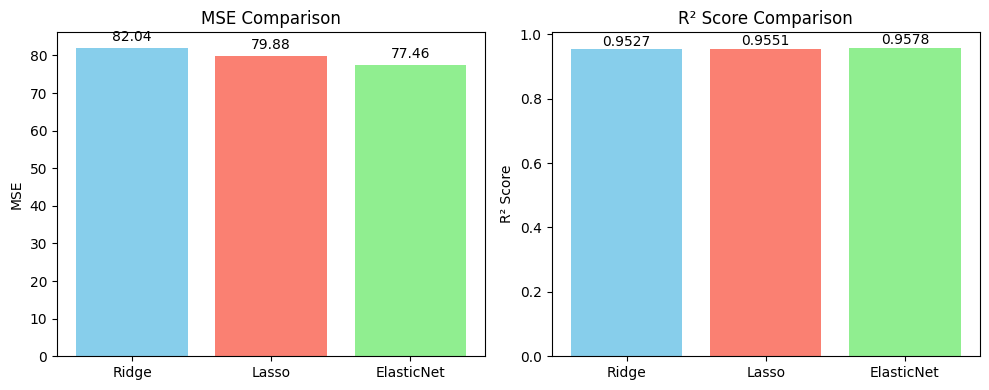

In [331]:
ridge_mse = ridge_mean_squared_error
lasso_mse = lasso_mean_squared_error
elasticnet_mse = elasticnNet_mean_squared_error

ridge_r2 = ridge_r2
lasso_r2 = lasso_r2
elasticnet_r2 = elasticnNet_r2


plt.figure(figsize=(10, 4))


plt.subplot(1, 2, 1)
bars1 = plt.bar(models, rmse_values, color=['skyblue', 'salmon', 'lightgreen'])
plt.title('MSE Comparison')
plt.ylabel('MSE')
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.2f}", ha='center', va='bottom')


plt.subplot(1, 2, 2)
bars2 = plt.bar(models, r2_values, color=['skyblue', 'salmon', 'lightgreen'])
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.002, f"{yval:.4f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


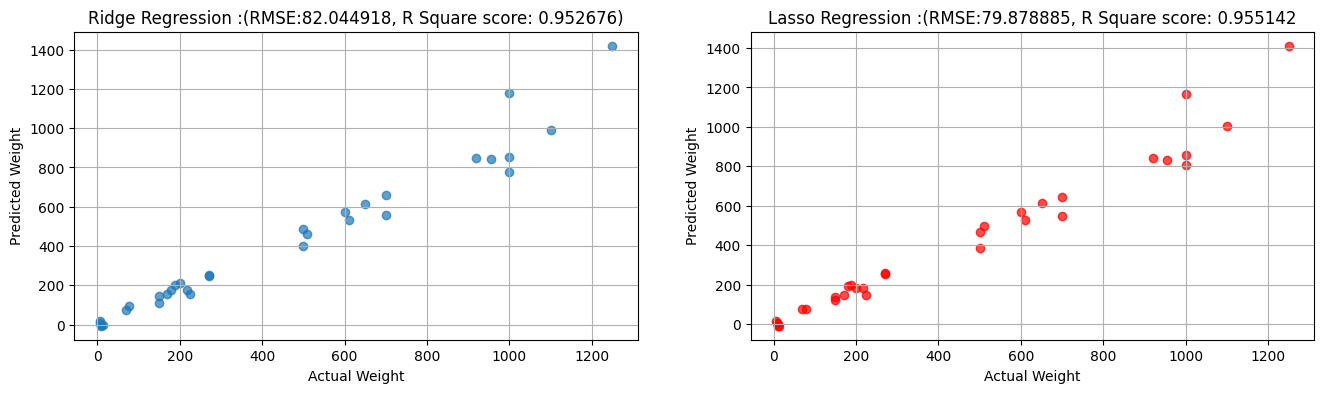

<Figure size 640x480 with 0 Axes>

In [332]:
plt.figure(figsize =(16,4))

plt.subplot(1,2,1)
plt.scatter(y_test,prediction_result_ridge, alpha =0.7)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.grid(True)
plt.title(f"Ridge Regression :(RMSE:{ridge_mean_squared_error:2f}, R Square score: {ridge_r2:2f})")



plt.subplot(1,2,2)
plt.scatter(y_test,prediction_result_lasso, alpha =0.7, color = "red")
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.grid(True)
plt.title(f"Lasso Regression :(RMSE:{lasso_mean_squared_error:2f}, R Square score: {lasso_r2:2f}")


plt.show()
plt.tight_layout()

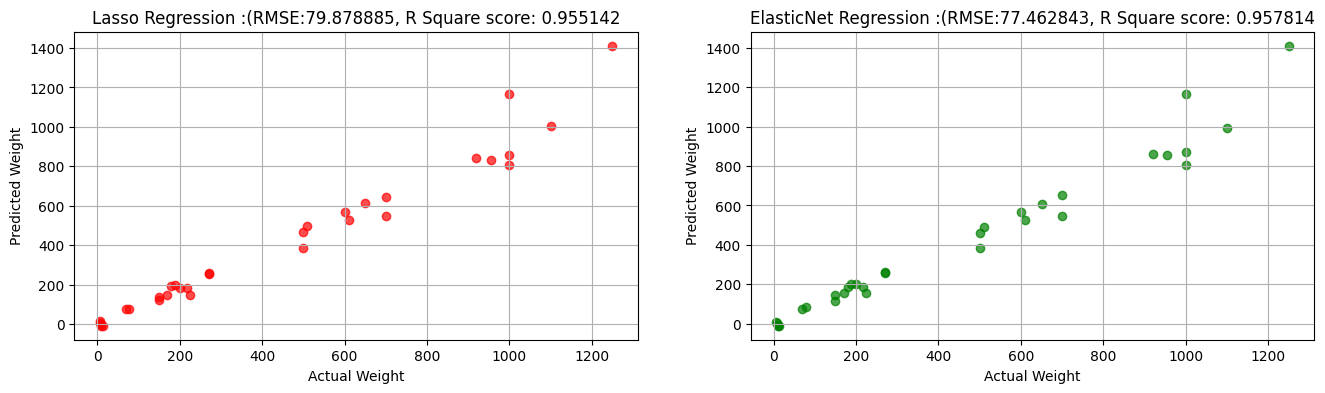

<Figure size 640x480 with 0 Axes>

In [333]:
plt.figure(figsize =(16,4))
plt.subplot(1,2,1)
plt.scatter(y_test,prediction_result_lasso, alpha =0.7, color = "red")
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.grid(True)
plt.title(f"Lasso Regression :(RMSE:{lasso_mean_squared_error:2f}, R Square score: {lasso_r2:2f}")

plt.subplot(1,2,2)
plt.scatter(y_test,prediction_result_elasticNet, alpha =0.7, color = "green")
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.grid(True)
plt.title(f"ElasticNet Regression :(RMSE:{elasticnNet_mean_squared_error:2f}, R Square score: {elasticnNet_r2:2f}")

plt.show()
plt.tight_layout()

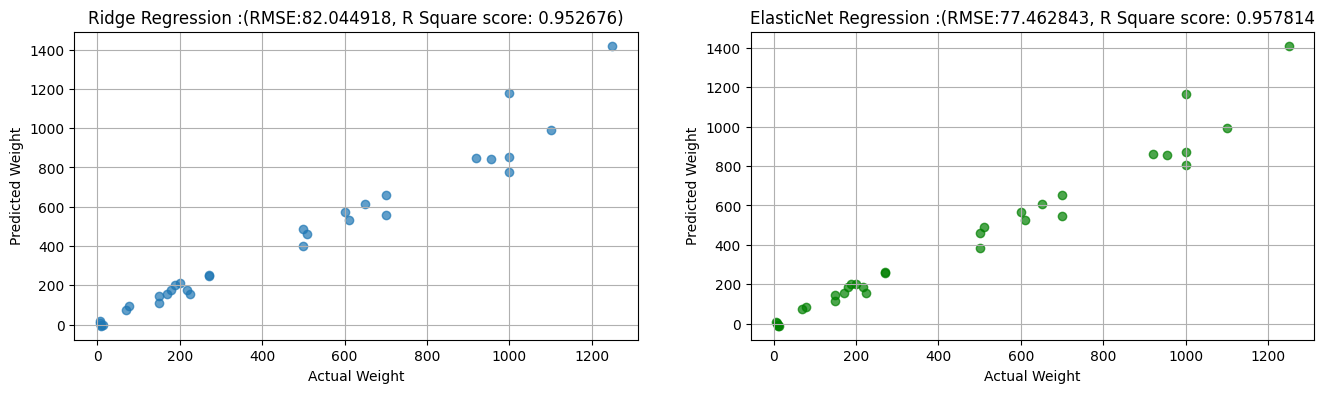

<Figure size 640x480 with 0 Axes>

In [334]:
plt.figure(figsize =(16,4))

plt.subplot(1,2,1)
plt.scatter(y_test,prediction_result_ridge, alpha =0.7)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.grid(True)
plt.title(f"Ridge Regression :(RMSE:{ridge_mean_squared_error:2f}, R Square score: {ridge_r2:2f})")
plt.subplot(1,2,2)
plt.scatter(y_test,prediction_result_elasticNet, alpha =0.7, color = "green")
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.grid(True)
plt.title(f"ElasticNet Regression :(RMSE:{elasticnNet_mean_squared_error:2f}, R Square score: {elasticnNet_r2:2f}")

plt.show()
plt.tight_layout()


# Fish Species Classification with Logistic Regression

In [335]:
x1 = dataset[["Length1","Length2","Length3","Height","Width", "Weight"]]
y1 = dataset["Species"]

In [336]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scalling = StandardScaler()
x_scalling = scalling.fit_transform(x1)

In [337]:
x_train,x_test, y_train,y_test = train_test_split(x_scalling,y1,test_size =.2, random_state = 42)

In [338]:
models = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 1.0, max_iter = 1000)
models.fit(x_train,y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [339]:
model_prediction = models.predict(x_test)
model_prediction

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch', 'Bream', 'Smelt',
       'Perch', 'Perch', 'Pike', 'Bream', 'Perch', 'Bream', 'Parkki',
       'Bream', 'Bream', 'Perch', 'Perch', 'Perch', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Perch', 'Perch', 'Perch',
       'Smelt', 'Smelt', 'Pike', 'Perch'], dtype=object)

In [343]:
classificationReport_dic = classification_report(y_test, model_prediction, output_dict = True)
print(classificationReport_dic )

{'Bream': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10}, 'Parkki': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, 'Perch': {'precision': 0.6923076923076923, 'recall': 1.0, 'f1-score': 0.8181818181818181, 'support': 9}, 'Pike': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3}, 'Roach': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'Smelt': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5}, 'Whitefish': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3}, 'accuracy': 0.875, 'macro avg': {'precision': 0.6703296703296704, 'recall': 0.7142857142857143, 'f1-score': 0.6883116883116883, 'support': 32}, 'weighted avg': {'precision': 0.7884615384615384, 'recall': 0.875, 'f1-score': 0.8238636363636364, 'support': 32}}


In [341]:
classificationReport = classification_report(y_test, model_prediction, output_dict = False)
print(classificationReport)

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        10
      Parkki       1.00      1.00      1.00         1
       Perch       0.69      1.00      0.82         9
        Pike       1.00      1.00      1.00         3
       Roach       0.00      0.00      0.00         1
       Smelt       1.00      1.00      1.00         5
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.88        32
   macro avg       0.67      0.71      0.69        32
weighted avg       0.79      0.88      0.82        32



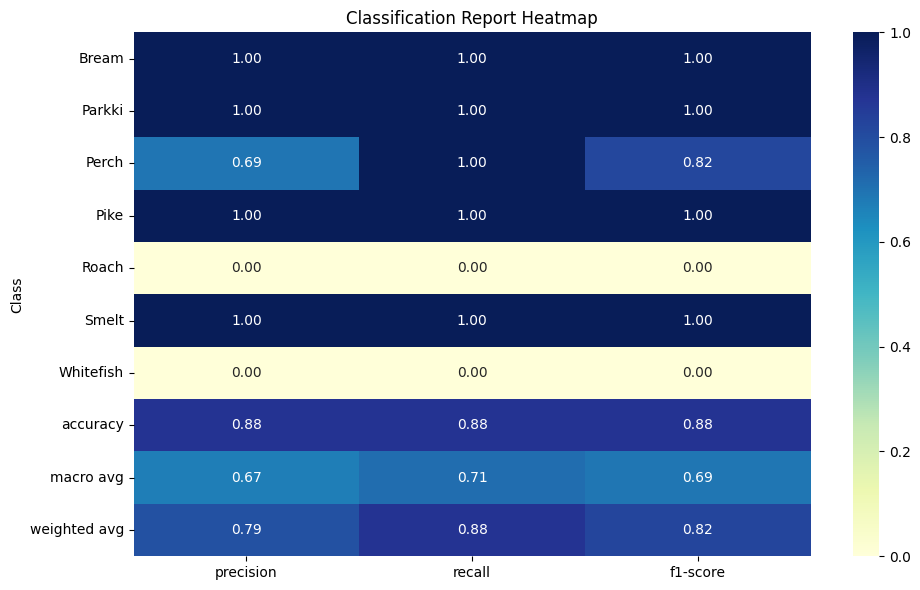

In [345]:
import seaborn as sns
report_df = pd.DataFrame(classificationReport_dic ).T


plt.figure(figsize=(10, 6))
sns.heatmap(report_df.drop(columns='support'), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Classification Report Heatmap')
plt.ylabel('Class')
plt.tight_layout()
plt.show()

In [342]:
confusionMatrix = confusion_matrix(y_test, model_prediction)
print(confusionMatrix)

[[10  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  9  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  3  0  0  0  0]]
